1. Підготовка та імпорт бібліотек / Preparing and importing libraries

In [1]:
import psycopg2 #для імпорта з БД / for import from database
import kagglehub #для імпорта з Kaggle / for import from Kaggle
from kagglehub import KaggleDatasetAdapter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

2. Импорт датасета / Import dataset

In [ ]:
# з БД / from DB
db_params = {
    'host': '..........',
    'database': '..........',
    'user': '..........',
    'password': '..........',
    'port': '..........'
}
with psycopg2.connect(**db_params) as connection:
    print("Connect success")
    query = '''
        SELECT *
        FROM Table
    '''
    df = pd.read_sql_query(query, connection)

In [2]:
# from kaggle
df = kagglehub.dataset_load(
        kagglehub.KaggleDatasetAdapter.PANDAS,
        "willianoliveiragibin/food-delivery-time",
        "Food_Time new.csv",
    )
df.head()

,Traffic_Level,ID,Delivery_person_ID,weather_description,Type_of_order,Type_of_vehicle,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET
0,High,70A2,CHENRES12DEL01,mist,Snack,scooter,32,4.6,12.972.793,80.249.982,13.012.793,80.289.982,26.55,87.0,0.0,9.89,43.45
1,High,95B4,RANCHIRES15DEL01,clear sky,Meal,scooter,33,4.7,23.369.746,8.533.982,23.479.746,8.544.982,17.51,69.0,0.0,19.11,3.816.666.667
2,High,CDCD,DEHRES17DEL01,clear sky,Snack,motorcycle,36,4.2,30.327.968,78.046.106,30.397.968,78.116.106,12.44,77.0,0.0,11.59,3.636.666.667
3,High,2784,PUNERES13DEL03,clear sky,Drinks,scooter,23,4.7,1.856.245,73.916.619,1.865.245,74.006.619,19.37,65.0,0.0,21.93,49.45
4,High,6F67,HYDRES14DEL01,overcast clouds,Snack,motorcycle,34,4.9,17.426.228,78.407.495,17.496.228,78.477.495,21.29,64.0,0.0,18.26,5.248.333.333


3. Описовий аналіз та очистка даних / Descriptive analysis and data cleaning

In [3]:
#видаляємо нерелевантні дані / delete irrelevant data
df=df[df['Restaurant_latitude']!="0"]
df=df[df['TARGET']!="#VALUE!"]
df=df[df['Distance (km)']>0]

df.head()

,Traffic_Level,ID,Delivery_person_ID,weather_description,Type_of_order,Type_of_vehicle,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET
0,High,70A2,CHENRES12DEL01,mist,Snack,scooter,32,4.6,12.972.793,80.249.982,13.012.793,80.289.982,26.55,87.0,0.0,9.89,43.45
1,High,95B4,RANCHIRES15DEL01,clear sky,Meal,scooter,33,4.7,23.369.746,8.533.982,23.479.746,8.544.982,17.51,69.0,0.0,19.11,3.816.666.667
2,High,CDCD,DEHRES17DEL01,clear sky,Snack,motorcycle,36,4.2,30.327.968,78.046.106,30.397.968,78.116.106,12.44,77.0,0.0,11.59,3.636.666.667
3,High,2784,PUNERES13DEL03,clear sky,Drinks,scooter,23,4.7,1.856.245,73.916.619,1.865.245,74.006.619,19.37,65.0,0.0,21.93,49.45
4,High,6F67,HYDRES14DEL01,overcast clouds,Snack,motorcycle,34,4.9,17.426.228,78.407.495,17.496.228,78.477.495,21.29,64.0,0.0,18.26,5.248.333.333


In [4]:
df.shape

(9080, 17)

In [5]:
# Приводимо ТАРГЕТ до одного формату / Bringing 'TARGET' to a single format
df['TARGET'] = df['TARGET'].apply(lambda x: round(float(x.replace('.', '')) / 60000000, 2) if len(str(x)) > 5 else float(x))
df=df[df['TARGET']>0]

df.head()

,Traffic_Level,ID,Delivery_person_ID,weather_description,Type_of_order,Type_of_vehicle,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET
0,High,70A2,CHENRES12DEL01,mist,Snack,scooter,32,4.6,12.972.793,80.249.982,13.012.793,80.289.982,26.55,87.0,0.0,9.89,43.45
1,High,95B4,RANCHIRES15DEL01,clear sky,Meal,scooter,33,4.7,23.369.746,8.533.982,23.479.746,8.544.982,17.51,69.0,0.0,19.11,63.61
2,High,CDCD,DEHRES17DEL01,clear sky,Snack,motorcycle,36,4.2,30.327.968,78.046.106,30.397.968,78.116.106,12.44,77.0,0.0,11.59,60.61
3,High,2784,PUNERES13DEL03,clear sky,Drinks,scooter,23,4.7,1.856.245,73.916.619,1.865.245,74.006.619,19.37,65.0,0.0,21.93,49.45
4,High,6F67,HYDRES14DEL01,overcast clouds,Snack,motorcycle,34,4.9,17.426.228,78.407.495,17.496.228,78.477.495,21.29,64.0,0.0,18.26,87.47


In [6]:
#заповнюємо пусті дані / fill missing values
df['Distance'] = df['Distance (km)'].round(0)
df['TARGET'] = df.groupby(['Type_of_vehicle', 'Distance'])['TARGET'].transform(lambda x: x.fillna(x.mean()))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9029 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                9029 non-null   object 
 1   ID                           9029 non-null   object 
 2   Delivery_person_ID           9029 non-null   object 
 3   weather_description          9029 non-null   object 
 4   Type_of_order                9029 non-null   object 
 5   Type_of_vehicle              9029 non-null   object 
 6   Delivery_person_Age          9029 non-null   int64  
 7   Delivery_person_Ratings      9029 non-null   float64
 8   Restaurant_latitude          9029 non-null   object 
 9   Restaurant_longitude         9029 non-null   object 
 10  Delivery_location_latitude   9029 non-null   object 
 11  Delivery_location_longitude  9029 non-null   object 
 12  temperature                  9029 non-null   float64
 13  humidity               

In [8]:
#Видаляємо зайві стовпці / Delete columns
df_clean = df.drop(['ID', 'Delivery_person_ID', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude','Distance'], axis=1)

In [9]:
df_clean.sample(10)

,Traffic_Level,weather_description,Type_of_order,Type_of_vehicle,Delivery_person_Age,Delivery_person_Ratings,temperature,humidity,precipitation,Distance (km),TARGET
4241,Low,mist,Snack,motorcycle,34,5.0,28.53,81.0,0.0,8.70,43.44
6046,Moderate,mist,Snack,scooter,24,4.7,28.27,82.0,0.0,8.97,58.86
6029,Moderate,mist,Drinks,motorcycle,27,4.6,19.98,83.0,0.0,10.02,39.55
5256,Moderate,mist,Buffet,motorcycle,27,5.0,25.00,73.0,0.0,13.73,31.20
993,High,clear sky,Snack,motorcycle,34,5.0,19.37,65.0,0.0,17.23,76.36
4744,Moderate,haze,Snack,motorcycle,36,4.6,17.14,72.0,0.0,9.49,34.10
2809,Low,clear sky,Buffet,motorcycle,23,4.9,22.85,43.0,0.0,8.42,30.97
8748,Very High,clear sky,Drinks,electric_scooter,27,4.6,23.60,46.0,0.0,26.07,66.85
2530,High,scattered clouds,Buffet,electric_scooter,23,4.6,24.30,90.0,0.0,18.71,47.85
6391,Moderate,haze,Drinks,scooter,27,4.7,24.00,64.0,0.0,13.05,40.25


In [10]:
df_clean.describe()

,Delivery_person_Age,Delivery_person_Ratings,temperature,humidity,precipitation,Distance (km),TARGET
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,29.511685,4.625795,22.627954,64.581127,0.000378,14.258375,55.041201
std,5.691388,0.323264,3.345929,15.371229,0.018322,8.342847,27.238280
min,15.000000,1.000000,6.770000,27.000000,0.000000,1.550000,5.800000
25%,25.000000,4.500000,19.950000,52.000000,0.000000,7.600000,34.500000
50%,29.000000,4.700000,22.860000,65.000000,0.000000,13.390000,50.890000
75%,34.000000,4.800000,25.000000,73.000000,0.000000,19.570000,71.140000
max,50.000000,6.000000,29.050000,94.000000,1.460000,59.840000,166.390000


4. Візуалізація даних/ Data visualization

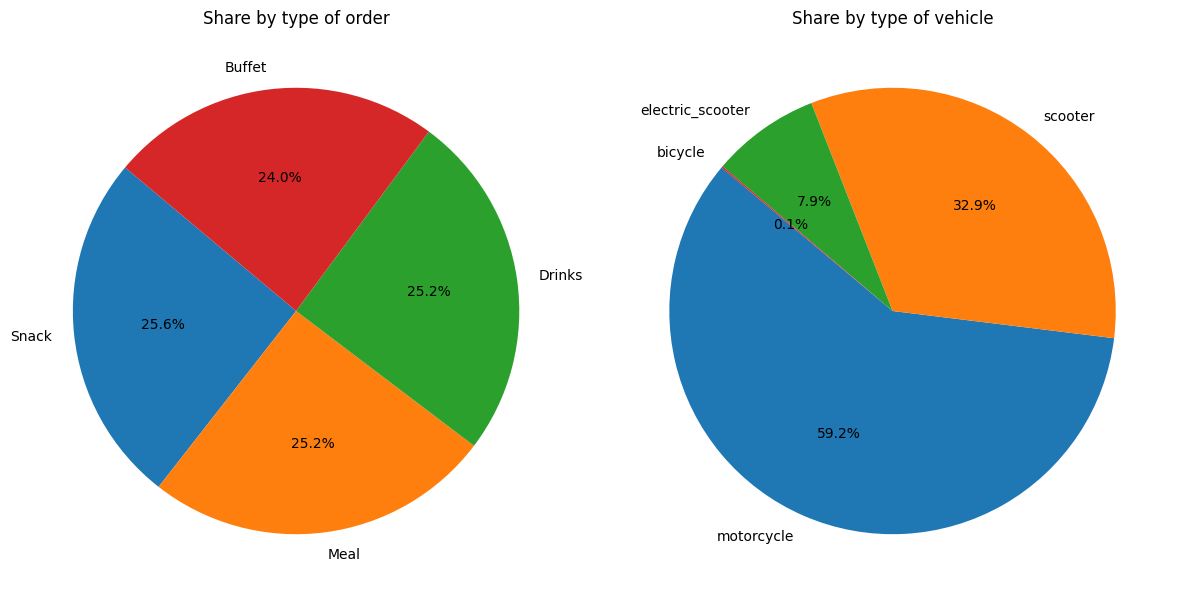

In [11]:
order_counts = df_clean["Type_of_order"].value_counts()
vehicle_counts = df_clean["Type_of_vehicle"].value_counts()

# Побудова кругових діаграм / Building pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Графік по типу замовлень / Chart by type of order
axes[0].pie(order_counts, labels=order_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title("Share by type of order")

# Графік по типу транспорту / Chart by type of vehicle
axes[1].pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title("Share by type of vehicle")

# Показать графики
plt.tight_layout()
plt.show()

По типу замовлень розподіл майже однаковий. По типу транспорту найбільшу частину займають мотоцикли - 59%, найменшу велосипеди - 0,1%

The distribution by type of orders is almost the same. By type of transport, the largest share is occupied by motorcycles - 59%, the smallest by bicycles - 0.1%.

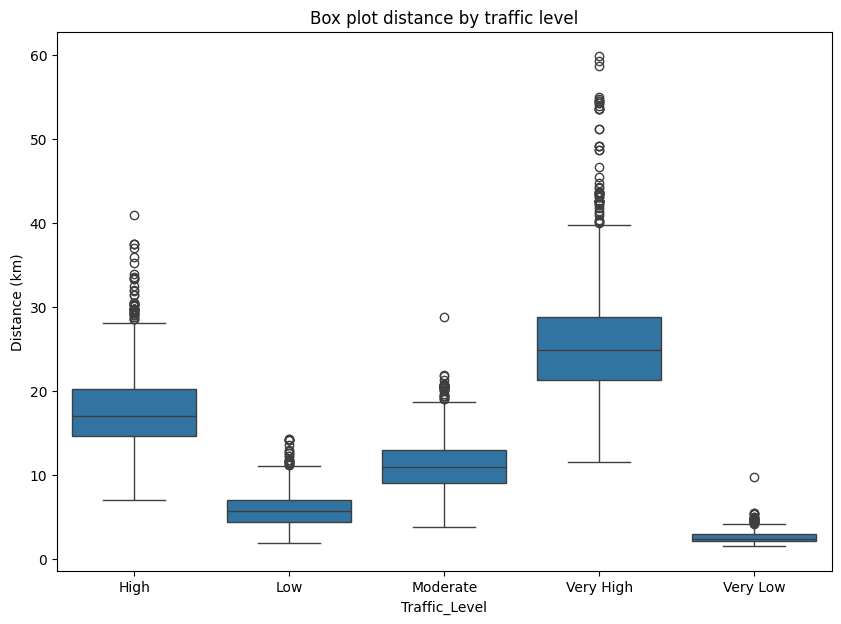

In [12]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="Traffic_Level", y="Distance (km)", data=df_clean)

# Заголовки
plt.title("Box plot distance by traffic level")
plt.xlabel("Traffic_Level")
plt.ylabel("Distance (km)")

# Показать график
plt.show()

In [13]:
df_clean.groupby("Traffic_Level")["Distance (km)"].agg(pd.Series.mode).sort_values(ascending=False)

Traffic_Level
Very High    24.84
High         16.42
Moderate      9.33
Low           6.97
Very Low      2.41
Name: Distance (km), dtype: float64

З вигляду корбкового графіку можна зробити висновок, що найбільші по відстані доставки були при дуже завантаженому русі на дорозі (медіана - 25 км). І навпаки найкоротші доставки були при найменш завантаженому (медіана - 2,4 км)

From the appearance of the box plot, we can conclude that the longest delivery distances were during very busy traffic on the road (median - 25 km). Conversely, the shortest deliveries were during the least busy traffic (median - 2,4 km).

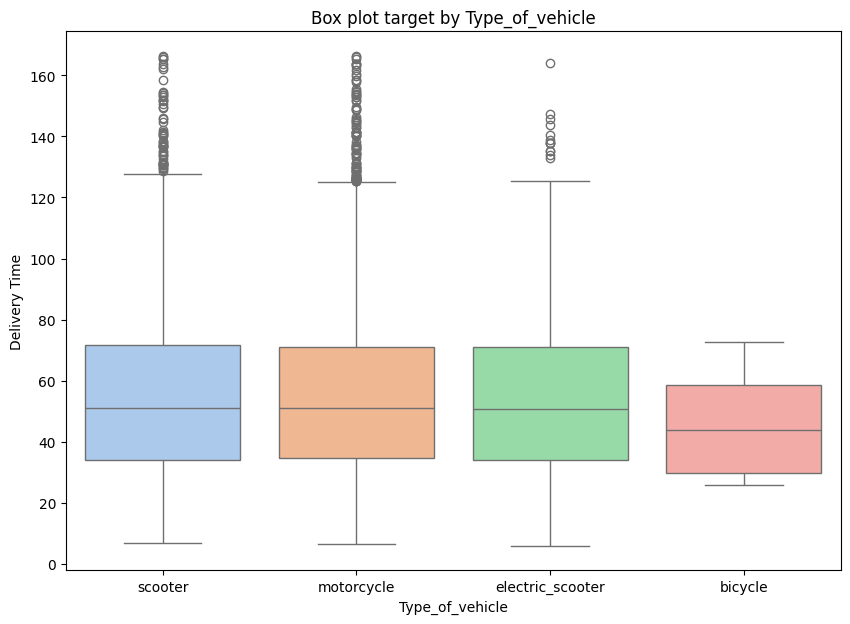

In [14]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="Type_of_vehicle", y="TARGET", hue="Type_of_vehicle", data=df_clean, legend=False, palette="pastel")

# Заголовки
plt.title("Box plot target by Type_of_vehicle")
plt.xlabel("Type_of_vehicle")
plt.ylabel("Delivery Time")

# Показать график
plt.show()

In [15]:
df_clean.groupby("Type_of_vehicle")["TARGET"].median()

Type_of_vehicle
bicycle             43.670
electric_scooter    50.640
motorcycle          50.890
scooter             51.015
Name: TARGET, dtype: float64

Час доставки по типам транспорту був приблизно однаковим, трохи швидше були велосипеди, але вони і брали коротші дистанції

Delivery times by type of transport were approximately the same, bicycles were slightly faster, but they also covered shorter distances.

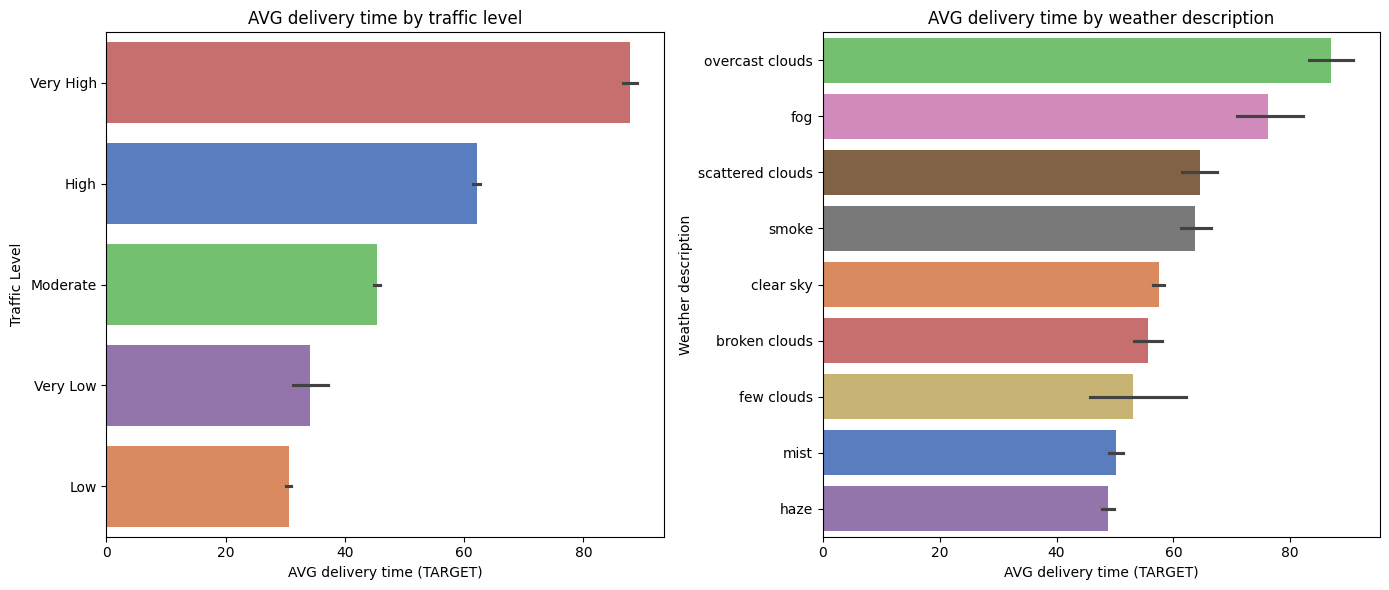

In [16]:
# у moderate rain має одне значення, міняємо його на overcast clouds / moderate rain has one value, change it to overcast clouds
df_clean.loc[df_clean["weather_description"] == "moderate rain", "weather_description"] = "overcast clouds"

traffic_order = df_clean.groupby("Traffic_Level")["TARGET"].mean().sort_values(ascending=False).index
weather_order = df_clean.groupby("weather_description")["TARGET"].mean().sort_values(ascending=False).index

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Горизонтальна гістограма по Traffic_Level / Horizontal hist by Traffic_Level
sns.barplot(y="Traffic_Level", x="TARGET", hue="Traffic_Level", data=df_clean, ax=axes[0], 
            palette="muted", estimator=lambda x: x.mean(), legend=False, order=traffic_order)
axes[0].set_title("AVG delivery time by traffic level")
axes[0].set_xlabel("AVG delivery time (TARGET)")
axes[0].set_ylabel("Traffic Level")

# Горизонтальна гістограма по weather_description / Horizontal hist by weather_description
sns.barplot(y="weather_description", x="TARGET", hue="weather_description", data=df_clean, ax=axes[1], 
            palette="muted", estimator=lambda x: x.mean(), legend=False, order=weather_order)
axes[1].set_title("AVG delivery time by weather description")
axes[1].set_xlabel("AVG delivery time (TARGET)")
axes[1].set_ylabel("Weather description")

plt.tight_layout()
plt.show()

Простежується пряма залежність між рівнем трафіку і часом доставки, а також між погодними умовами і часом. Чим гірша погода - тим повільніше доставка.

There is a direct relationship between traffic levels and delivery times, as well as between weather conditions and time. The worse the weather, the slower the delivery.

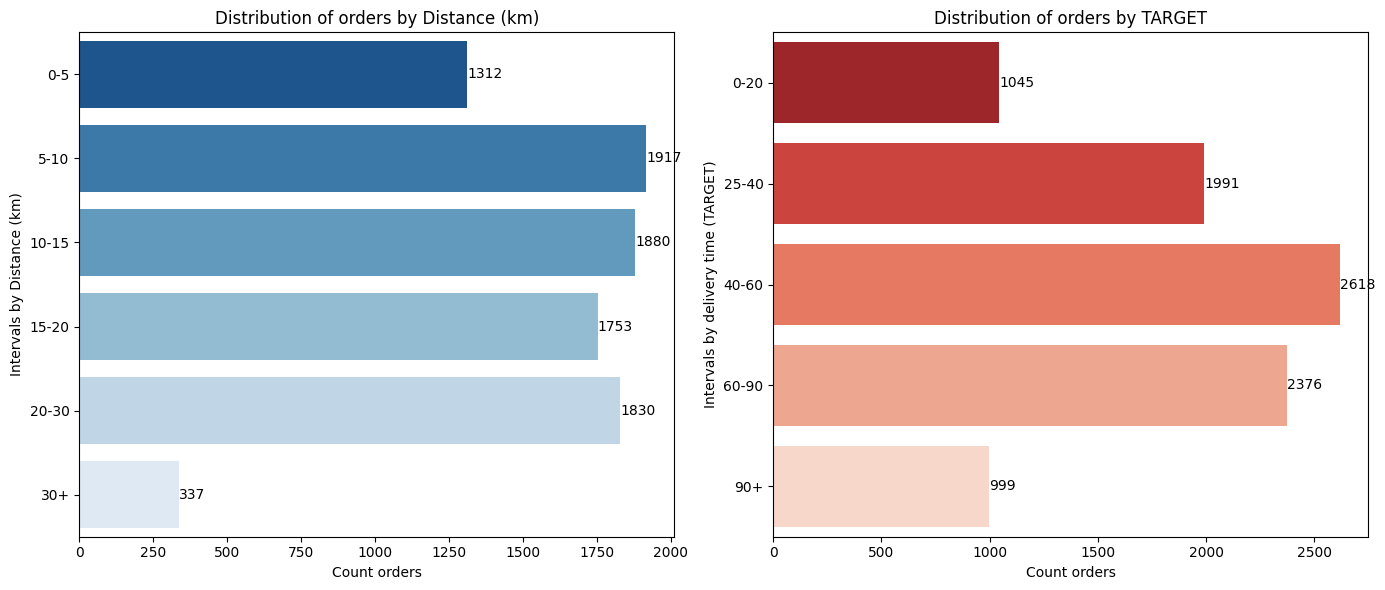

In [17]:
distance_bins = [0, 5, 10, 15, 20, 30, float("inf")]  
target_bins = [0, 25, 40, 60, 90, float("inf")]  

# Розбиття на інтервали / Partitioning into intervals
df_clean["Distance_Range"] = pd.cut(df_clean["Distance (km)"], bins=distance_bins, labels=["0-5", "5-10", "10-15", "15-20", "20-30", "30+"])
df_clean["Target_Range"] = pd.cut(df_clean["TARGET"], bins=target_bins, labels=["0-20", "25-40", "40-60", "60-90", "90+"])

# Підрахунок кількості замовлень у кожному діапазоні / Counting the number of orders in each range
distance_counts = df_clean["Distance_Range"].value_counts().reindex(["0-5", "5-10", "10-15", "15-20", "20-30", "30+"])
target_counts = df_clean["Target_Range"].value_counts().reindex(["0-20", "25-40", "40-60", "60-90", "90+"])


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Hist by Distance (km)
sns.barplot(y=distance_counts.index.astype(str), x=distance_counts.values, hue=distance_counts.index.astype(str), ax=axes[0], palette="Blues_r", legend=False)
axes[0].set_title("Distribution of orders by Distance (km)")
axes[0].set_xlabel("Count orders")
axes[0].set_ylabel("Intervals by Distance (km)")

# Додавання міток на стовпцях для графіка / Adding Column Labels to a Graph
for i, value in enumerate(distance_counts.values):
    axes[0].text(value, i, str(value), va='center', ha='left', fontsize=10)
# Hist by  TARGET
sns.barplot(y=target_counts.index.astype(str), x=target_counts.values, hue=target_counts.index.astype(str) , ax=axes[1], palette="Reds_r", legend=False)
axes[1].set_title("Distribution of orders by TARGET")
axes[1].set_xlabel("Count orders")
axes[1].set_ylabel("Intervals by delivery time (TARGET)")

for i, value in enumerate(target_counts.values):
    axes[1].text(value, i, str(value), va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

Розподіл кількості замовлень по дистанції доставки показує майже рівну кількість від 5 до 30 км, трохи менше замовлень до 5 км і найменше від 30 км. По часу доставки - найбільша кількість від 40 до 60 хв і найменша до 20 хв і від 90 хв.

The distribution of the number of orders by delivery distance shows an almost equal number from 5 to 30 km, slightly fewer orders up to 5 km and the least from 30 km. By delivery time - the largest number from 40 to 60 min and the smallest up to 20 min and from 90 min.

C:\Users\Analytic\AppData\Local\Temp\ipykernel_17948\2486789739.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_distances = df_clean.groupby("Age_Range")["Distance (km)"].mean()


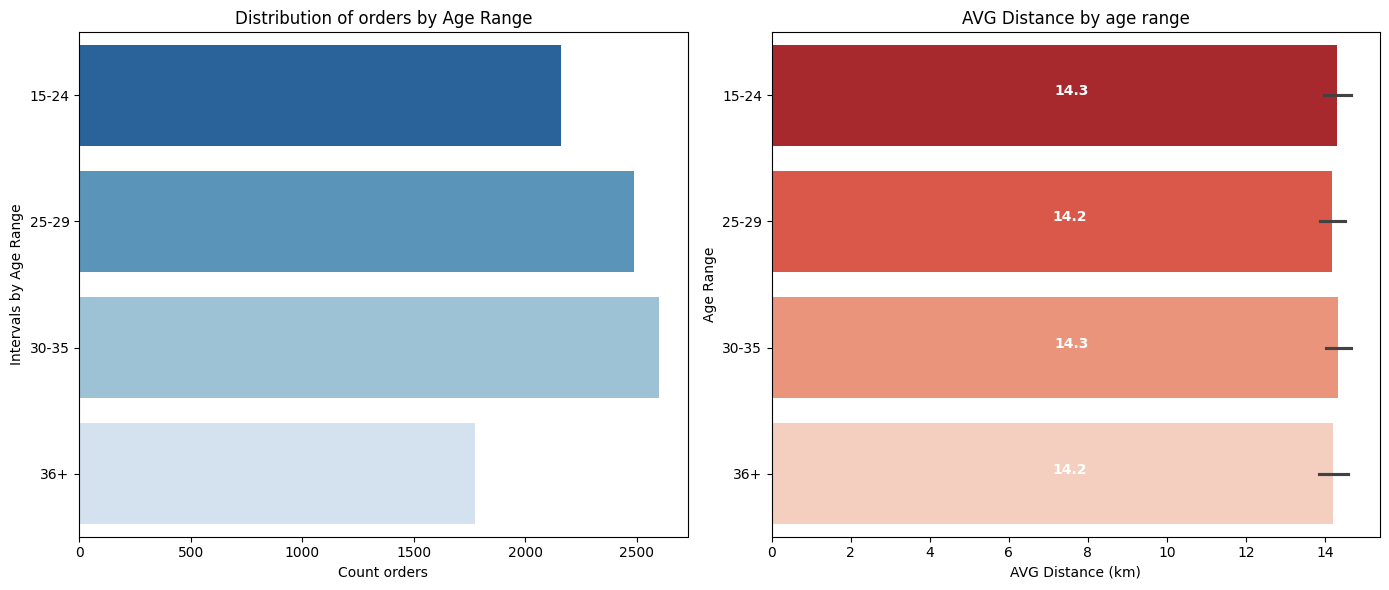

In [18]:
df_clean["Age_Range"] = pd.cut(df["Delivery_person_Age"], 
                            bins=[15, 24, 29, 35, float("inf")],  
                            labels=["15-24", "25-29", "30-35", "36+"])

# Підрахунок кількості замовлень у кожному діапазоні / Counting the number of orders in each range
age_counts = df_clean["Age_Range"].value_counts().sort_index()
# Підрахунок середньої дистанції у кожному діапазоні / Calculating the average distance in each range
avg_distances = df_clean.groupby("Age_Range")["Distance (km)"].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Hist by Age Range
sns.barplot(y=age_counts.index.astype(str), x=age_counts.values, hue=age_counts.index.astype(str), legend=False, ax=axes[0], palette="Blues_r")
axes[0].set_title("Distribution of orders by Age Range")
axes[0].set_xlabel("Count orders")
axes[0].set_ylabel("Intervals by Age Range")

# Hist AVG Distance by age range
sns.barplot(data=df_clean, x="Distance (km)", y="Age_Range", hue="Age_Range", legend=False, ax=axes[1], palette="Reds_r")

axes[1].set_title("AVG Distance by age range")
axes[1].set_xlabel("AVG Distance (km)")
axes[1].set_ylabel("Age Range")

# Додавання міток на стовпцях для графіка / Adding Column Labels to a Graph
for i, v in enumerate(avg_distances):
    axes[1].text(v/2,  # x координата (середина бара) / coordinate (middle of the bar)
            i,    # y координата (позиція бара) . coordinate (position of the bar)
            f'{v:.1f}',
            fontweight='bold', 
            color='white')

plt.tight_layout()
plt.show()

Найбільшу кількість замовлень виконали курьєри від 30 до 35 років, найменшу - які старші 36 років. По середній дистанції у всіх вікових групах майже однакові значення.

The largest number of orders was fulfilled by couriers aged 30 to 35, the smallest by those over 36. The average distance in all age groups is almost the same.

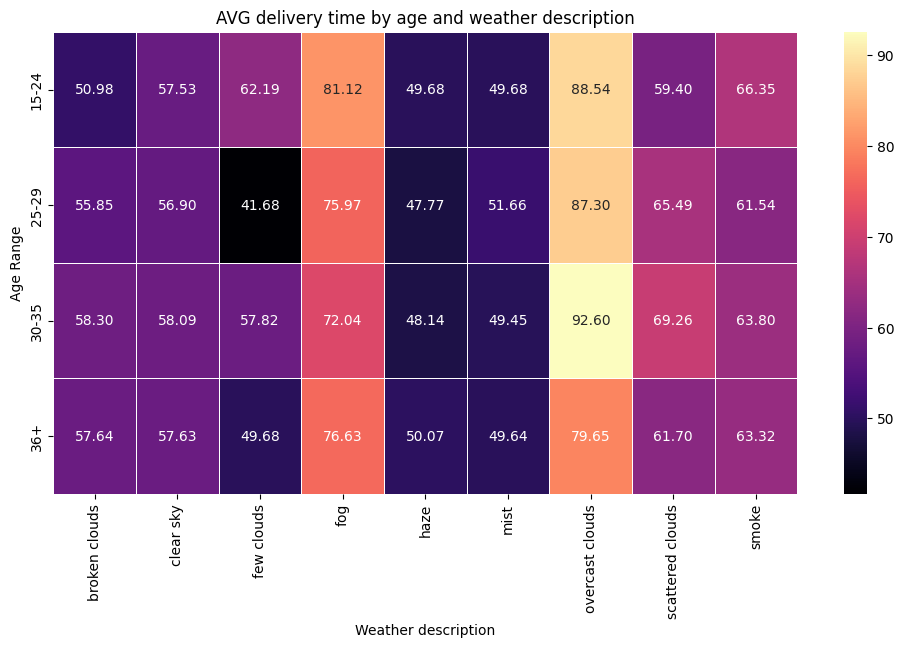

In [19]:
# хітмап середній час доставки по віку і погодним умовам / hitmap AVG delivery time by Age range and Weather description
pivot_table = df_clean.pivot_table(index="Age_Range", columns="weather_description", values="TARGET", aggfunc="mean")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap="magma", fmt=".2f", linewidths=0.5)
plt.title("AVG delivery time by age and weather description")
plt.xlabel("Weather description")
plt.ylabel("Age Range")
plt.show()

Найшвидшу доставку виконували курьєри 25-29 років у ледь хмарну погоду - 42 хв, найдовшу 30-35 річні у хмарну - 93 хв. У вікових групах 15-24, 30-35 і 36+ найшвидша доставка була у ясну погоду.

The fastest delivery was made by couriers aged 25-29 in slightly cloudy weather - 42 minutes, the longest by 30-35 year olds in cloudy weather - 93 minutes. In the age groups 15-24, 30-35 and 36+, the fastest delivery was in clear weather.

__________________________________________

5. Створення прогнозної моделі

In [ ]:
# видаляємо зайві стовпці / remove extra columns
df_clean=df_clean.drop(columns=['Distance_Range', 'Target_Range','Age_Range'])

In [36]:
# міняємо формат текстових стовпців / change the format of text columns
categorical_cols = ['Traffic_Level', 'weather_description', 'Type_of_order', 'Type_of_vehicle']

for col in categorical_cols:
    df_clean[col] = df_clean[col].astype('category')

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9029 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Traffic_Level            9029 non-null   category
 1   weather_description      9029 non-null   category
 2   Type_of_order            9029 non-null   category
 3   Type_of_vehicle          9029 non-null   category
 4   Delivery_person_Age      9029 non-null   int64   
 5   Delivery_person_Ratings  9029 non-null   float64 
 6   temperature              9029 non-null   float64 
 7   humidity                 9029 non-null   float64 
 8   precipitation            9029 non-null   float64 
 9   Distance (km)            9029 non-null   float64 
 10  TARGET                   9029 non-null   float64 
dtypes: category(4), float64(6), int64(1)
memory usage: 600.6 KB


In [81]:
# створення пайплайну для заповнення і перетворення стовпців / creating a pipeline for filling and transforming columns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# виділяємо цільову змінну і параметри. Розбиваємо дані на тестові і перевірочні / The target change and parameters are visible. We break down the data for testing and verification
X = df_clean.drop(columns=['TARGET'])
y = df_clean['TARGET']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Відокремлюємо категоріальні і числові дані / Separate categorical and numerical data
categorical_cols = [cname for cname in X.columns if X[cname].nunique() < 10 and 
                    X[cname].dtype == "category"]

numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [85]:
# Створюємо словник моделей, які будуть використані / create a dictionary of models that will be used
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

# Оцінка моделей / Model evaluation
results = {}
for name, model in models.items():
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Навчання модели за допомогою пайплайну / Training a model using a pipeline
    pipeline.fit(X_train, y_train)
    
    y_pred_val = pipeline.predict(X_valid)
    
    # Оцінка метрик / Metrics evaluation
    mse = mean_squared_error(y_valid, y_pred_val)
    mae = mean_absolute_error(y_valid, y_pred_val)
    r2 = r2_score(y_valid, y_pred_val)
    
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    print(f"\n{name}:")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2: {r2:.2f}")


Linear Regression:
MSE: 299.62
MAE: 12.71
R2: 0.57

Random Forest:
MSE: 287.32
MAE: 12.52
R2: 0.58

XGBoost:
MSE: 293.91
MAE: 12.61
R2: 0.57

KNN:
MSE: 362.87
MAE: 14.25
R2: 0.47


Виходячи з результатів прогнозів, найкраще себе показали моделі Random Forest та XGBoost. В них найменші квадратичні та абсолютні помилки і найвище значення R2, тобто моделі найбільше відповідають фактичним даним

Based on the prediction results, the Random Forest and XGBoost models performed best. They have the smallest squared and absolute errors and the highest R2 value, meaning the models best fit the actual data.

In [86]:
# вдосконалення обраних моделей за допомогою налаштування гіперпараметрів / improving selected models by tuning hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters for Random Forest
param_dist_rf = {
    'model__n_estimators': [100, 200, 300, 500, 1000],
    'model__max_depth': [5, 10, 20, 30, 50, None],
    'model__min_samples_split': [2, 5, 10, 20],
    'model__min_samples_leaf': [1, 2, 4, 8],
    'model__max_features': ['sqrt', 'log2', None] 
}

# Hyperparameters for XGBoost
param_dist_xgb = {
    'model__n_estimators': [100, 200, 300, 500, 1000],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'model__max_depth': [3, 5, 7, 9, 11],
    'model__min_child_weight': [1, 3, 5, 7],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Застосування гіперпараметрів до Random Forest / Applying hyperparameters to Random Forest
rf_random = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)
print("\nBest parameters for Random Forest:", rf_random.best_params_)
print("Best MAE для Random Forest:", -rf_random.best_score_)

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

# Застосування гіперпараметрів до XGBoost / Applying hyperparameters to XGBoost
xgb_random = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist_xgb,
    n_iter=10,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)
xgb_random.fit(X_train, y_train)
print("\nBest parameters for XGBoost:", xgb_random.best_params_)
print("Best MAE для XGBoost:", -xgb_random.best_score_)


Лучшие параметры для Random Forest: {'model__n_estimators': 500, 'model__min_samples_split': 20, 'model__min_samples_leaf': 2, 'model__max_features': 'sqrt', 'model__max_depth': None}
Лучший MAE для Random Forest: 12.783825972774123

Лучшие параметры для XGBoost: {'model__subsample': 0.8, 'model__n_estimators': 500, 'model__min_child_weight': 1, 'model__max_depth': 7, 'model__learning_rate': 0.01, 'model__colsample_bytree': 0.6}
Лучший MAE для XGBoost: 12.859636624197416


In [80]:
# Застосуємо покращені моделі на перевірочних даних / Apply improved models to test data 
y_pred_rf = rf_random.best_estimator_.predict(X_valid)
rf_mae = mean_absolute_error(y_valid, y_pred_rf)
rf_mse = mean_squared_error(y_valid, y_pred_rf)
rf_r2 = r2_score(y_valid, y_pred_rf)

print("\nRandom Forest (after RandomizedSearchCV) on the validation sample:")
print(f"MAE: {rf_mae:.2f}")
print(f"MSE: {rf_mse:.2f}")
print(f"R2: {rf_r2:.2f}")

y_pred_xgb = xgb_random.best_estimator_.predict(X_valid)
xgb_mae = mean_absolute_error(y_valid, y_pred_xgb)
xgb_mse = mean_squared_error(y_valid, y_pred_xgb)
xgb_r2 = r2_score(y_valid, y_pred_xgb)

print("\nXGBoost (after RandomizedSearchCV) on the validation sample:")
print(f"MAE: {xgb_mae:.2f}")
print(f"MSE: {xgb_mse:.2f}")
print(f"R2: {xgb_r2:.2f}")


Random Forest (после RandomizedSearchCV) на валидационной выборке:
MAE: 12.29
MSE: 265.22
R2: 0.62

XGBoost (после RandomizedSearchCV) на валидационной выборке:
MAE: 12.24
MSE: 262.66
R2: 0.62


Обидві моделі мають схожі результати, але XGBoost має нижчі значення похибок MSE і MAE. То ж визнаємо її за кращу для цієї задачі.

Both models have similar results, but XGBoost has lower MSE and MAE errors. Therefore, we recognize it as the best for this task.

Feature Importance:
                                      Feature  Importance
9                cat__Traffic_Level_Very High    0.504046
7                      cat__Traffic_Level_Low    0.125343
6                     cat__Traffic_Level_High    0.115226
8                 cat__Traffic_Level_Moderate    0.064277
10                cat__Traffic_Level_Very Low    0.030785
5                          num__Distance (km)    0.026217
21                  cat__Type_of_order_Drinks    0.015942
22                    cat__Type_of_order_Meal    0.012575
12         cat__weather_description_clear sky    0.009753
16              cat__weather_description_mist    0.007333
17   cat__weather_description_overcast clouds    0.007252
3                               num__humidity    0.006773
2                            num__temperature    0.006555
23                   cat__Type_of_order_Snack    0.006412
20                  cat__Type_of_order_Buffet    0.006341
15              cat__weather_description_haze    0.0

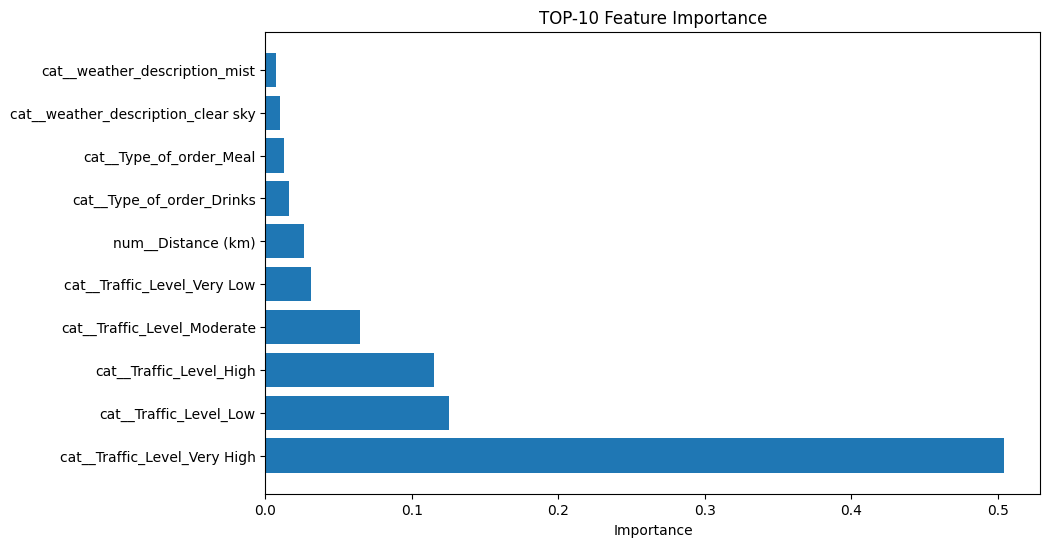

In [93]:
#Важливість ознак: XGBoost дозволяє оцінити, які ознаки найважливіші для передбачень / Feature Importance: XGBoost allows you to assess which features are most important for predictions:
best_xgb_model = xgb_random.best_estimator_
feature_names = best_xgb_model.named_steps['preprocessor'].get_feature_names_out()
importances = best_xgb_model.named_steps['model'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)
print("Feature Importance:")
print(feature_importance_df)

# Vizualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('TOP-10 Feature Importance')
plt.show()

У даному кейсі найважливішими показниками, які впливають на точність прогнозів є рівень дорожнього трафіку та відстань доставки.

In this case, the most important indicators that affect the accuracy of forecasts are the level of road traffic and delivery distance.

ВИСНОВКИ

Які дані можна додати для покращення точності моделі?
1. Географічні та маршрутні дані
Тип дороги:
Міська вулиця, шосе, путівця. Це впливає швидкість руху.
Приклад: road_type (категоріальний: "urban", "highway", "rural").
Кількість поворотів або перехресть:
Більше поворотів = більше часу на маневри.

2. Тимчасові дані
Час замовлення:
Годинник пік (ранок, вечір) сильно впливає на час доставки.
Приклад: order_hour (числовий: 0-23), is_peak_hour (бінарний: 0 або 1).
День тижня:
У вихідні дні трафік та поведінка кур'єрів можуть відрізнятися.
Приклад: day_of_week (категоріальний: "Monday", "Tuesday", ... або числовий: 0-6).

3. Дані про замовлення
Вага або обсяг замовлення:
Важкі або громіздкі замовлення можуть сповільнити доставку.
Приклад: order_weight (числовий, кг), order_volume (числовий, м ³).
Кількість позицій у замовленні:
Більше позицій = довше збирати та перевіряти.
Приклад: num_items (числовий).
Терміновість замовлення:
Деякі замовлення мають пріоритет, що може прискорити доставку.
Приклад: is_urgent (бінарний: 0 або 1).

4. Дані про кур'єра
Тип кур'єра:
Досвідчений кур'єр може працювати швидше, ніж новачок.
Приклад: courier_experience (числовий: стаж на місяці) або courier_type (категоріальний: "experienced", "new").

SUMMARIZE

1. Geographical and route data
Road type:
Urban street, highway, country road. This affects the speed of travel.
Example: road_type (categorical: "urban", "highway", "rural").
Number of turns or intersections:
More turns = more time to maneuver.

2. Time data
Order time:
Rush hours (morning, evening) greatly affect delivery times.
Example: order_hour (numeric: 0-23), is_peak_hour (binary: 0 or 1).
Day of week:
Traffic and courier behavior may differ on weekends.
Example: day_of_week (categorical: "Monday", "Tuesday", ..., or numeric: 0-6).

3. Order data
Order weight or volume:
Heavy or bulky orders may slow down delivery.
Example: order_weight (numeric, kg), order_volume (numeric, m³).
Number of items in the order:
More items = longer to assemble and check.
Example: num_items (numeric).
Order urgency:
Some orders have priority, which can speed up delivery.
Example: is_urgent (binary: 0 or 1).

4. Courier details
Courier type:
An experienced courier can work faster than a newbie.
Example: courier_experience (numeric: experience in months) or courier_type (categorical: "experienced", "new").